# Getting Started with Image Understanding using the AI Refinery SDK

Welcome! This notebook is a beginner-friendly guide to using the Accenture AI Refinery SDK for a common and powerful task: **Image Understanding**.

This notebook uses the `DistillerClient`, which allows for building complex, multi-agent systems. We will walk through setting up a simple configuration to use the powerful, single-purpose **Image Understanding Agent**.

### What is Image Understanding?

Image understanding, or Visual Question Answering (VQA), is a fascinating AI capability where you can ask a question about an image in plain English. The AI model "sees" the image and provides a text-based answer. For example, you could show it a picture of a city street and ask, "*How many cars are in this image?*"

### What is the AI Refinery SDK?
The AI Refinery SDK is a toolkit that makes it easier for developers to build and use powerful AI agents. It handles the complex parts of connecting to and interacting with large AI models, so you can focus on building your application. The `DistillerClient` is a key component that orchestrates how different agents work together to solve a task.

## Step 1: Installation

First, we need to install the necessary libraries. We'll install `airefinery-sdk`, `python-dotenv` (used by the SDK examples), `requests` to help us display our example image, `Pillow` to work with image files, and `PyYAML` to create our configuration.

You can run the cell below by selecting it and pressing **Shift + Enter**.

In [1]:
%pip install airefinery-sdk python-dotenv requests Pillow PyYAML

Note: you may need to restart the kernel to use updated packages.


## Step 2: Securely Enter Your Credentials

To use the AI Refinery SDK, you need an **Account** and an **API Key**. These are your credentials for accessing the AI models.

**It is very important to keep your credentials private.** You should never write them directly in your code (hardcoding) or share them publicly.

We'll use Python's `getpass` library, which provides a secure way to enter your details. When you run the cell below, it will prompt you for each value in a text box that hides the characters as you type. We will then set them as environment variables, which is a common practice the SDK examples follow.

In [2]:
import os
import getpass

# Securely get the Account and API key from the user
account = getpass.getpass("Please enter your AI Refinery Account: ")
api_key = getpass.getpass("Please enter your AI Refinery API Key: ")

# Set the credentials as environment variables for the SDK to use
os.environ["ACCOUNT"] = account
os.environ["API_KEY"] = api_key

print("Credentials have been set successfully!")

Credentials have been set successfully!


## Step 3: Create the Agent Configuration File

The `DistillerClient` uses a YAML file to define which agents are available and how they should be orchestrated. For this tutorial, we only need to define the `ImageUnderstandingAgent`.

Instead of making you create this file manually, the cell below will create the `example.yaml` file for you in the current directory. This keeps our notebook self-contained.

In [3]:
import yaml

config_data = {
    'orchestrator': {
        'agent_list': [
            {'agent_name': 'Image Understanding Agent'}
        ]
    },
    'utility_agents': [
        {
            'agent_class': 'ImageUnderstandingAgent',
            'agent_name': 'Image Understanding Agent',
            'agent_description': 'This agent can help you understand and analyze an image.',
            'config': {}
        }
    ]
}

config_file_path = 'example.yaml'
with open(config_file_path, 'w') as f:
    yaml.dump(config_data, f, default_flow_style=False)

print(f"'{config_file_path}' created successfully.")

'example.yaml' created successfully.


## Step 4: Login and Initialize the Distiller Client

Now we will perform the setup required to use the client. This cell logs in with your credentials and creates a `DistillerClient` instance that is configured with our `example.yaml` file. 

We only need to run this setup once. The `distiller_client` object will then be available for us to use in the following steps.

In [4]:
from air import DistillerClient, login

# Authenticate using the environment variables we set earlier
login(
    account=str(os.getenv("ACCOUNT")),
    api_key=str(os.getenv("API_KEY")),
)
print("Login successful.")

# Create a distiller client
distiller_client = DistillerClient()

# Upload your config file to register a new distiller project
distiller_client.create_project(config_path="example.yaml", project="example")
print("Project 'example' created and client is ready to use.")


***********************************************************************
*                  NOTICE: AUTHORIZED ACCESS ONLY                     *
***********************************************************************
By accessing AI Refinery an AI multi-agent commercial system
and any of its affiliate websites owned and operated
by Accenture, you acknowledge and consent to the following:
    - Monitoring & Compliance: System activity may be monitored,
        recorded, and audited in accordance with AI All Accenture
        Policies, AI diffusion Act controls and regulatory
        requirements.
    - Strict Prohibition of Unauthorized Use: Unauthorized access
      or misuse of this system is strictly prohibited and may result
      in access restrictions or other enforcement actions.
    - Policy Adherence: All authorized use must strictly comply
      with all Accenture, AI Standards, Security Standards,
      and Organizational Policies.
      
Continued use of this system constitu

## Step 5: Ask a Question About a Chart

Now that the client is initialized, we can ask our first question. We will use the `distiller_client` object we created in the previous step.

This cell will:
1. Define the image URL and the question.
2. Use the `dc.query()` method, passing the question and the image.
3. Loop through the asynchronous response to get the content.

**Note:** In a Jupyter environment, you can use `await` directly in a cell to run asynchronous code.

Displaying the image we are analyzing:


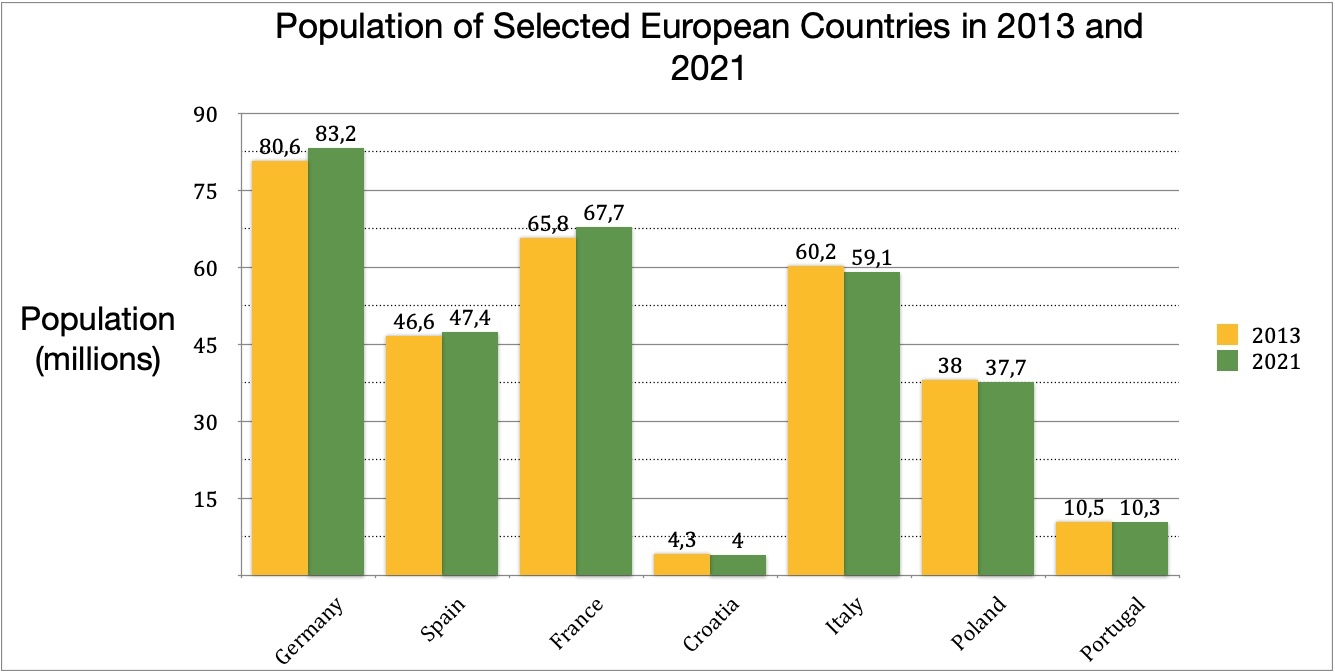


Sending request to the Image Understanding Agent... (This may take a moment)

--- AI Response ---
Analyzing the image...
The image presents a bar chart illustrating the population of selected European countries in 2013 and 2021. The chart features a white background with black text, accompanied by yellow and green bars representing the population figures for each country.

**Countries and Population Figures:**

*   Germany: 80.6 million (2013), 83.2 million (2021)
*   Spain: 46.6 million (2013), 47.4 million (2021)
*   France: 65.8 million (2013), 67.7 million (2021)
*   Croatia: 4.3 million (2013), 4 million (2021)
*   Italy: 60.2 million (2013), 59.1 million (2021)
*   Poland: 38 million (2013), 37.7 million (2021)
*   Portugal: 10.5 million (2013), 10.3 million (2021)

**Key Observations:**

*   Germany experienced a significant increase in population from 2013 to 2021, with a growth of 2.6 million people.
*   Spain also saw an increase in population, albeit smaller than Germany's,

In [5]:
from air import utils
from PIL import Image
import requests

# URL of the image we want to use
image_url = "https://sdk.airefinery.accenture.com/tutorial/img_understanding/chart.png"

# Display the image for context
print("Displaying the image we are analyzing:")
display(Image.open(requests.get(image_url, stream=True).raw))

# Use the client to ask a question about the image
async with distiller_client(
    project="example",
    uuid="test_user_chart", # A unique identifier for the user/session
) as dc:
    print("\nSending request to the Image Understanding Agent... (This may take a moment)")
    responses = await dc.query(
        query="What's in this image? Describe the chart in detail.",
        image=utils.image_to_base64(
            image_url
        ),
    )
    
    print("\n--- AI Response ---")
    async for response in responses:
        # Extract and print the 'content' field from the response
        print(response["content"])
    print("-------------------")

## Step 6: Try Your Own Questions!

Now it's your turn. You can modify the `my_question` and `my_image_url` in the cell below to ask about any image on the web. Since the `distiller_client` is already set up, we can just call it again.

Here are some ideas for questions and images:
* **Image:** A picture of a famous landmark. **Question:** "What is the history of this place?"
* **Image:** A picture of a meal. **Question:** "What cuisine is this and what might the ingredients be?"
* **Image:** The table image from the documentation. **Question:** "Convert the table shown in the image into markdown format"

Displaying the image we are analyzing:


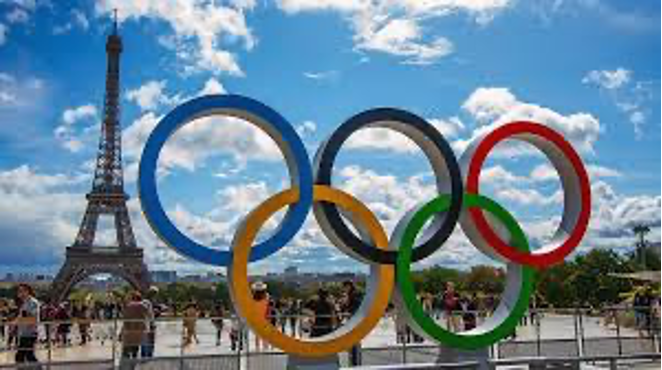


Asking the agent: 'Describe this image and explain its significance.'

--- AI Response ---
Analyzing the image...
The image depicts the Olympic rings in front of the Eiffel Tower, set against a blue sky with white clouds. The Olympic rings are prominently displayed in the foreground, with the Eiffel Tower visible in the background. The image appears to be a photograph taken during the day, with people milling about in the area. The overall atmosphere suggests a sense of excitement and anticipation, possibly related to an upcoming Olympic event.

The significance of this image lies in its representation of the Olympic Games, which are a symbol of international unity and athletic competition. The Olympic rings, comprising five interconnected rings of equal size, colored blue, yellow, black, green, and red, respectively, are a universally recognized emblem of the Olympic Movement. The Eiffel Tower, an iconic landmark in Paris, France, serves as a backdrop for the Olympic rings, highlight

In [6]:
# --- Try your own question and image URL here! ---
my_image_url = "https://sdk.airefinery.accenture.com/tutorial/img_understanding/general_image_reading.png"
my_question = "Describe this image and explain its significance."
# ------------------------------------------------

# Display the image for context
print("Displaying the image we are analyzing:")
display(Image.open(requests.get(my_image_url, stream=True).raw))

async with distiller_client(project="example", uuid="test_user_general") as dc:
    print(f"\nAsking the agent: '{my_question}'")
    responses = await dc.query(
        query=my_question,
        image=utils.image_to_base64(my_image_url),
    )
    print("\n--- AI Response ---")
    async for response in responses:
        print(response["content"])
    print("-------------------")

## Congratulations!

You've successfully used the new `DistillerClient` to build and query an image understanding agent. 

You have learned how to:
- Install the necessary libraries.
- Securely handle your Account and API Key.
- Create a YAML configuration file for the SDK programmatically.
- Initialize the `DistillerClient` once and reuse it for multiple queries.
- Use the client to ask questions about an image from a URL.

From here, you can explore the full documentation to learn about creating more complex agentic frameworks with multiple, specialized agents working together.